Pb= 0.1954921875 Pa= 0.057796875


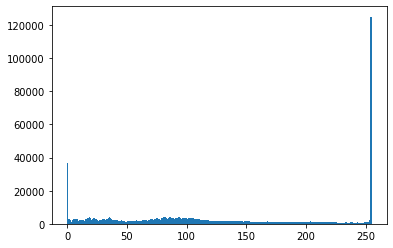

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("/content/drive/MyDrive/DIP/Kiddegraded.tif",cv2.IMREAD_GRAYSCALE)
s1=0
s2=0
for u in range (0,800):
  for v in range (0,800):
    if(img[u,v]==255):
      s1=s1+1
    elif(img[u,v]==0):
      s2=s2+1
print('Pb=',s1/640000,'Pa=',s2/640000)
plt.hist(img.ravel(),256,[0,255])
plt.show()

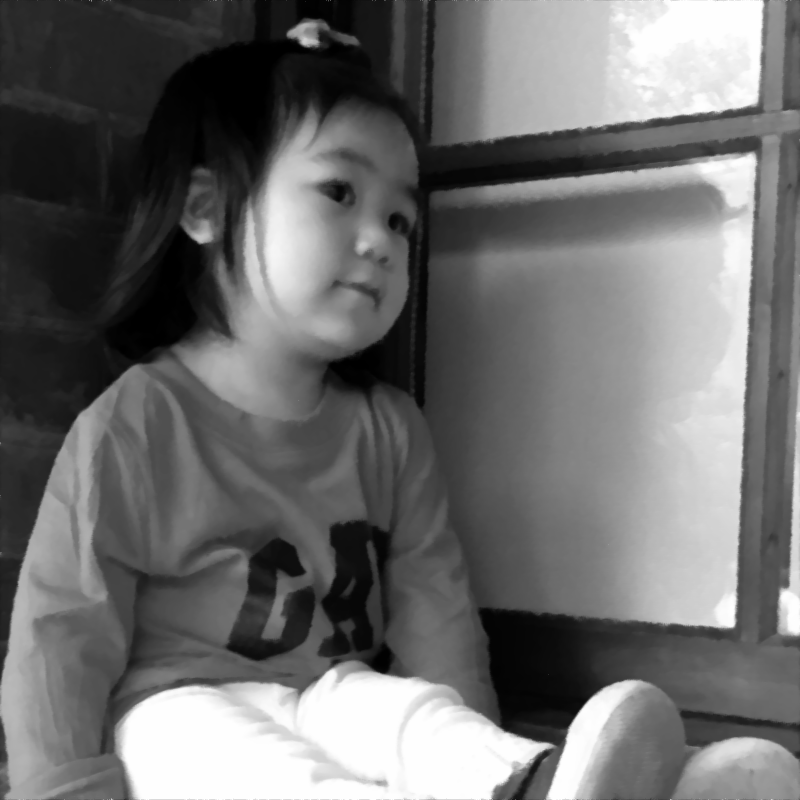

<Figure size 432x288 with 0 Axes>

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
def QuickSort(array):
    less = []
    equal = []
    greater = []

    if len(array) > 1:
        pivot = array[0]
        for x in array:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            elif x > pivot:
                greater.append(x)

        return QuickSort(less)+equal+QuickSort(greater)  
    else:  
        return array
img=cv2.imread("/content/drive/MyDrive/DIP/Kiddegraded.tif",cv2.IMREAD_GRAYSCALE)
height,width=img.shape
for u in range (0,height):
  for v in range (0,width):
    arr=[]
    #alpha trimmed mean filter 5*5mask alpha=16
    for i in range (-2,3):
      for j in range (-2,3):
        #padding scheme
        if ((u-i)<0 or (v-j)<0 or (u-i)>799 or (v-j)>799):
          if v-j>799 and 0<=(u-i)<=799:
            arr.append(img[u-i,799])
          elif v-j<0 and 0<=(u-i)<=799:
            arr.append(img[u-i,0])
          elif u-j>799 and 0<=(v-j)<=799:
            arr.append(img[799,v-j])
          elif u-j<0 and 0<=(v-j)<=799:
            arr.append(img[0,v-j])
          else:
            arr.append(img[u,v])
        else:
          arr.append(img[u-i,v-j])
    arr=QuickSort(arr)
    middleindex=int((len(arr)-1)/2)
    total=0
    for k in range (-4,5):
      total+=arr[middleindex+k]
    total=int(total/9)
    img[u,v]=total
cv2_imshow(img)
plt.savefig('/content/drive/MyDrive/DIPproject3/kid(c).png',dpi =200)

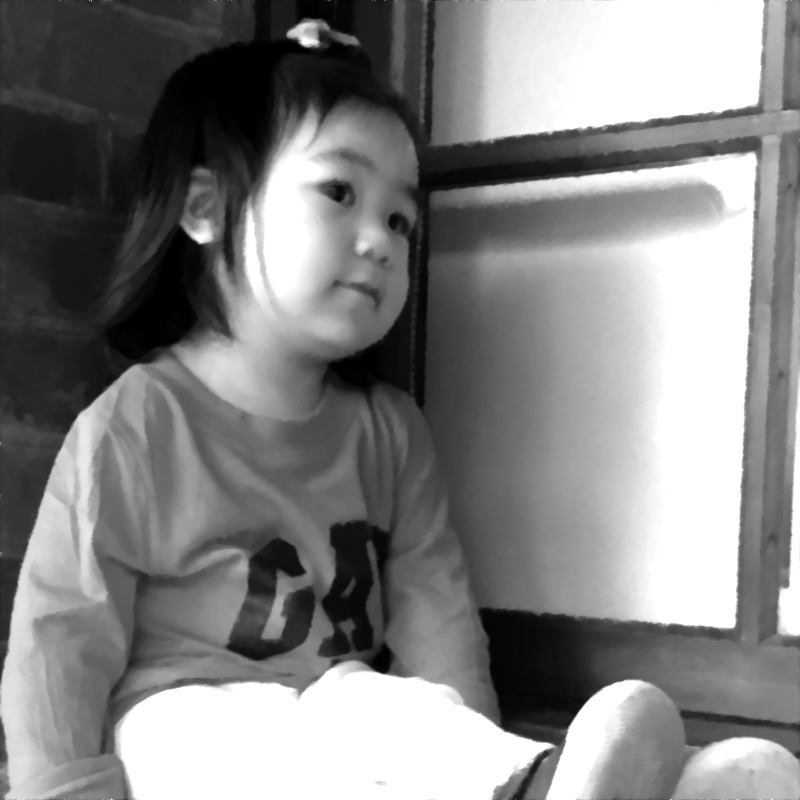

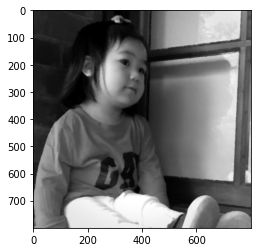

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("/content/drive/MyDrive/DIP/kidproject3.png",cv2.IMREAD_GRAYSCALE)
M,N=img.shape
#BLPF order n
n=2.25
#GLPF cutoff freq
D0=250
#BLPF cutoff freq
D1=350
beta=1
V=np.zeros((M,N),dtype=np.float32)
H=np.zeros((M,N),dtype=np.float32)
#GLPF
for i in range (0,M):
  for j in range (0,N):
    D=np.sqrt((i-M/2)**2+(j-N/2)**2)
    V[i,j]=np.exp(-D**2/(2*D0*D0))
#BLPF
for u in range (0,M):
  for v in range (0,N):
      H[u,v]=1/(1+beta*((((u-M/2)**2+(v-N/2)**2)/(D1**2))**(n)))
img=(img/V)*H
cv2_imshow(img)
plt.imshow(img,cmap='gray')
plt.savefig('/content/drive/MyDrive/DIPproject3/kid(d4).png',dpi =200)